In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns

In [ ]:
# Got data from https://www.ncsbe.gov/results-data/voter-registration-data
# Downloaded it this morning

## Load the Watauga and NC datasets

In [2]:
file = 'ncvoter95.txt'

wat_df = pd.read_csv(
    file,
    delimiter="\t",        
    usecols = ['zip_code', 'registr_dt', 'race_code', 'ethnic_code', 'party_cd', 'gender_code', 'birth_year'],
  #  index_col = 'registr_dt',
    encoding="latin-1",    # handles special characters
)
wat_df.head()

,zip_code,registr_dt,race_code,ethnic_code,party_cd,gender_code,birth_year
0,28608.0,09/24/2019,U,UN,UNA,U,2001
1,28607.0,09/24/2015,W,NL,UNA,M,1996
2,28604.0,04/11/2017,W,NL,DEM,F,1963
3,28607.0,08/24/2017,W,NL,DEM,F,1999
4,28607.0,10/25/2024,A,NL,UNA,M,2003


In [3]:
file = 'ncvoter_Statewide.txt'

nc_df = pd.read_csv(
    file,
    delimiter="\t",        
    usecols = ['zip_code', 'registr_dt', 'race_code', 'ethnic_code', 'party_cd', 'gender_code', 'birth_year'],
 #   index_col = 'registr_dt',
    encoding="latin-1",    # handles special characters
)
nc_df.head()

,zip_code,registr_dt,race_code,ethnic_code,party_cd,gender_code,birth_year
0,NaN,10/01/1984,W,NL,UNA,F,1935
1,NaN,02/23/2018,W,UN,UNA,F,1978
2,27302.0,10/31/2020,W,UN,REP,M,1966
3,27215.0,03/26/1996,W,UN,UNA,F,1976
4,27215.0,08/15/1989,W,NL,UNA,F,1945


## Clean and filter Watauga dataset

In [4]:
wat_df = wat_df[wat_df['registr_dt'] != '##/##/####']
wat_df['registr_dt'] = pd.to_datetime(wat_df['registr_dt'])
wat_df = wat_df.set_index('registr_dt')

wat_df_asc = wat_df.sort_index(ascending=True)

In [5]:
watdf_current = wat_df_asc.loc['08/01/2025':]
watdf_past = wat_df_asc.loc['08/01/2023':'10/29/2023']
watdf_current.count()

zip_code       1568
race_code      1568
ethnic_code    1568
party_cd       1568
gender_code    1568
birth_year     1568
dtype: int64

## Clean and filter NC dataset

In [6]:
nc_df = nc_df[nc_df['registr_dt'] != '##/##/####']
nc_df['registr_dt'] = pd.to_datetime(nc_df['registr_dt'])
nc_df = nc_df.set_index('registr_dt')

nc_df_asc = nc_df.sort_index(ascending=True)

In [7]:
ncdf_current = nc_df_asc.loc['08/01/2025':]
ncdf_past = nc_df_asc.loc['08/01/2023':'10/29/2023']
ncdf_current.count()

zip_code       104899
race_code      104902
ethnic_code    104902
party_cd       104902
gender_code    104902
birth_year     104902
dtype: int64

## Plots!

In [8]:
# Create dataframe
# Group miscellaneous parties into one

data_df = {
    'NC': ncdf_current['party_cd'].value_counts(),
    'Watuaga': watdf_current['party_cd'].value_counts()
}

party_df = pd.DataFrame(data_df)
party = party_df.T
party['OTR (LIB, GRE)'] = party['LIB'] + party['GRE']
party = party.drop(['LIB', 'GRE'], axis = 1)
party

,DEM,REP,UNA,"OTR (LIB, GRE)"
NC,22716,24164,57184,838
Watuaga,363,219,965,21


<Axes: title={'center': 'Watauga Party Reg Voters (since 8/1)'}>

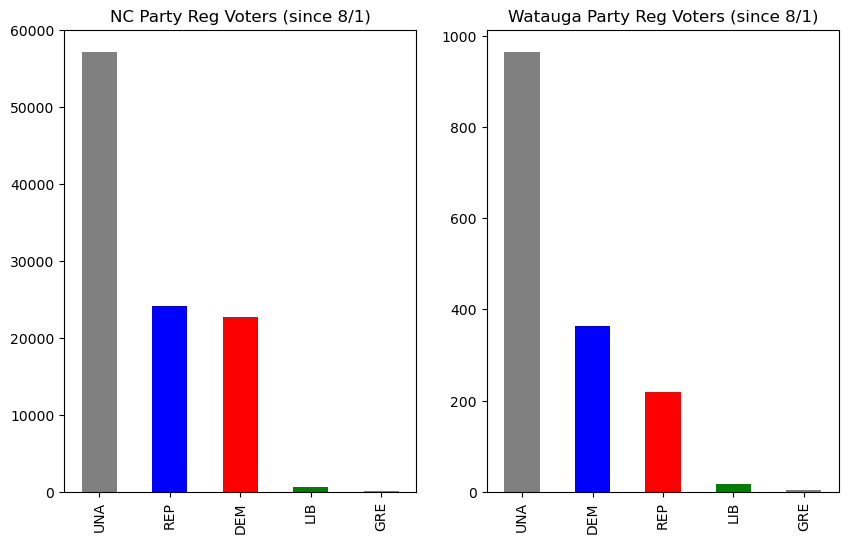

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (10, 6))

ncdf_current['party_cd'].value_counts().plot(ax = axes[0], kind = 'bar', stacked = True, title = 'NC Party New Reg Voters (since 8/1)', color = ['grey', 'blue', 'red', 'green'])

watdf_current['party_cd'].value_counts().plot(ax = axes[1], kind = 'bar', stacked = True, title = 'Watauga Party New Reg Voters (since 8/1)', color = ['grey', 'blue', 'red', 'green'])

In [16]:
# Create dataframe

data_df = {
    'NC': ncdf_current['gender_code'].value_counts(),
    'Watuaga': watdf_current['gender_code'].value_counts()
}

gen_df = pd.DataFrame(data_df)
gender = gen_df.T
gender

,F,M,U
NC,45854,40891,18157
Watuaga,690,619,259


<Axes: title={'center': 'Watauga Gender'}>

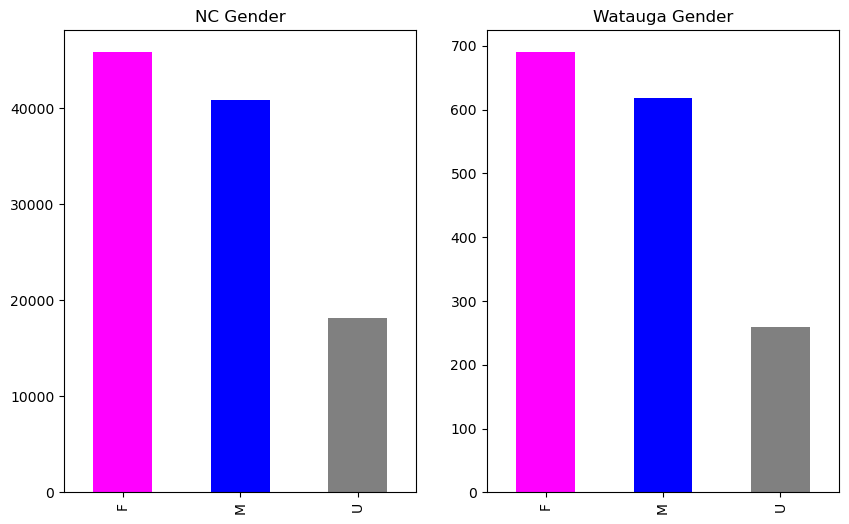

In [19]:
fig, axes = plt.subplots(1, 2, figsize = (10, 6))

ncdf_current['gender_code'].value_counts().plot(ax = axes[0], kind = 'bar', stacked = True, title = 'NC Gender', color = ['magenta', 'blue', 'grey'])

watdf_current['gender_code'].value_counts().plot(ax = axes[1], kind = 'bar', stacked = True, title = 'Watauga Gender', color = ['magenta', 'blue', 'gray'])